# Functions for reuse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version.*")

In [2]:
def plot_numeric_distributions(df, numeric_columns = None):
   
    # number of numerical columns
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=np.number).columns

    n_cols = 4
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    # grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    axes = axes.flatten()
    #print(axes)
    
    #  density plot for each column
    for ax, col in zip(axes, numeric_columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Density')

    for ax in axes[len(numeric_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version.*")

In [3]:
def plot_categorical_distributions(df, categorical_columns):
    
    
    n_cols = 4  #  columns in the grid 
    n_rows = int(np.ceil(len(categorical_columns) / n_cols))  

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    # Flatten axes array for iterating
    axes = axes.flatten()
    
    #create a bar plot for each one
    for ax, col in zip(axes, categorical_columns):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Counts')
        for item in ax.get_xticklabels(): 
            item.set_rotation(45) # rotate x ticks
        
    # Remove any unused plots
    for ax in axes[len(categorical_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

In [4]:
# Inspect range and datatypes of each column of a dataframe
def col_ranges_and_types(df):
    
    feature_types = df.dtypes
    
    feature_details = []
    
    for feature in df.columns:

        # categorical column 
        if feature_types[feature] == 'object':
            details = df[feature].dropna().unique().tolist()

        # Numeric column
        else:
            details = (df[feature].min(), df[feature].max())
        
        # Append feature name, range and data type 
        feature_details.append({
            'Feature': feature,
            'Value Range / Possible Values': details,
            'Data Type': feature_types[feature]
        })
    
    return pd.DataFrame(feature_details)

In [5]:
# Clean columns: remove whitespaces and tabs. Questionsmarks replace ? wit nan

def clean_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            
            # remove spaces, tabs and replace '?' with NaN
            df[col] = df[col].replace(r'\s+', '', regex=True).replace('?', np.nan)
            
    return df

In [6]:
def plot_numeric_distributions(df, numeric_columns = None):
   
    # number of numerical columns
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=np.number).columns

    n_cols = 4
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    # grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    axes = axes.flatten()
    #print(axes)
    
    #  density plot for each column
    for ax, col in zip(axes, numeric_columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Density')

    for ax in axes[len(numeric_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

In [7]:
# Clean columns: remove whitespaces and tabs. Questionsmarks replace ? wit nan

def clean_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            
            # remove spaces, tabs and replace '?' with NaN
            df[col] = df[col].replace(r'\s+', '', regex=True).replace('?', np.nan)
            
    return df

# Load Data and Import

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version.*")

In [12]:
kidney = pd.read_csv('datasets/kidney_disease.csv')

# Data Exploration

# Data Preprocessing

## Transforming and clean up the data

For a better and intuituive understanding we mapped the shorten column names into a longer and more understandable name. This provides more clarity in the further process.

In [13]:
# Rename columns for more inuitive understanding
col_names_kidney = {
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cell',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'class': 'class'
}

kidney.rename(columns=col_names_kidney, inplace=True)
kidney.drop('id', axis=1, inplace=True)
display(kidney)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


The function from above provides insights aboput the range and datatype for each column of the dataframe. We can see that there are some values not in the correct format. The columns:


- packed_cell_volume
- white_blood_cell_count
- red_blood_cell_count 

are an object type but instead they should be an float value. The categorical values are avtuelly binary. We can also see that there are tabs in the values.

We are transforming the columns into float typers and remove the tabs in the values. 

We are mapping the binary values to 0 and 1.  The binary variables are classification, anemia, pedal_edema, appetite, coronary_artery_disease, diabetes_mellitus, hypertension, bacteria, pus_cell_clumps, pus_cell and red_blood_cell.

We will transform that binary value into 1 and 0. 


In [14]:
col_ranges_and_types(kidney)

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"[normal, abnormal]",object
6,pus_cell,"[normal, abnormal]",object
7,pus_cell_clumps,"[notpresent, present]",object
8,bacteria,"[notpresent, present]",object
9,blood_glucose_random,"(22.0, 490.0)",float64


In [15]:
kidney = clean_columns(kidney)

kidney['packed_cell_volume'] = kidney['packed_cell_volume'].astype(float)
kidney['white_blood_cell_count'] = kidney['white_blood_cell_count'].astype(float)
kidney['red_blood_cell_count'] = kidney['red_blood_cell_count'].astype(float)

# The transformed data frame
col_ranges_and_types(kidney)

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"[normal, abnormal]",object
6,pus_cell,"[normal, abnormal]",object
7,pus_cell_clumps,"[notpresent, present]",object
8,bacteria,"[notpresent, present]",object
9,blood_glucose_random,"(22.0, 490.0)",float64


In [41]:
binary_mapping = {
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 'notckd': 0, 'normal': 1, 'abnormal': 0
}


columns_to_encode = [
    'classification', 'anemia', 'pedal_edema', 'appetite', 'coronary_artery_disease',
    'diabetes_mellitus', 'hypertension', 'bacteria', 'pus_cell_clumps', 'pus_cell',
    'red_blood_cell'
]

# Perfrom encoding
for col in columns_to_encode:
    if col in kidney.columns:
        kidney[col] = kidney[col].map(binary_mapping)


col_ranges_and_types(kidney)
#kidney[columns_to_encode].head()

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"(0.0, 1.0)",float64
6,pus_cell,"(0.0, 1.0)",float64
7,pus_cell_clumps,"(0.0, 1.0)",float64
8,bacteria,"(0.0, 1.0)",float64
9,blood_glucose_random,"(22.0, 490.0)",float64


## Missing Values

There are quite a lot missing values in our data set. We tried to impute them by using the Itterative Imputer from the sklearn library. 

From the sklearn documentation: "A more sophisticated approach is to use the **IterativeImputer** class, which models each feature with missing values as a function of other features, and uses that estimate for imputation"

So it is a multivariante Method to impute the missing values. 

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [68]:
kidney.isna().sum() 

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cell             152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

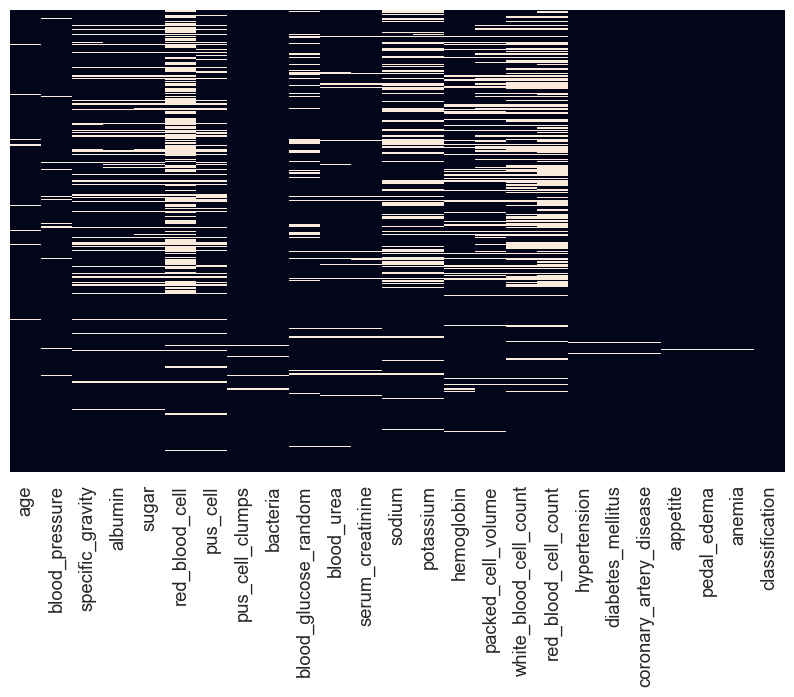

In [69]:
# Show the missing values visually 
plt.figure(figsize=(10, 6))
sns.heatmap(kidney.isnull(), cbar=False)
sns.set(font_scale=1.2) 

# deactivart yticks
plt.yticks([])

plt.show()





In [88]:
# Split data in test and train
# Test are all values with no missing values
kidney_test = kidney.dropna()

# Test are all remaning values
kidney_train = kidney[kidney.isnull().any(axis=1)]



imputer = IterativeImputer(estimator=RandomForestRegressor(), 
                           missing_values=np.nan,  
                           max_iter=20, 
                           tol=0.001,
                           random_state=123)

kidney_imputed = imputer.fit_transform(kidney_train) # fit the estimator

kidney_train = pd.DataFrame(kidney_imputed, columns=kidney.columns)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [105]:
#df_temp = kidney_train.copy(deep=True)

kidney_train = df_temp.copy(deep=True)

kidney_train.isna().sum()



age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

Since this produce float values for the (actually binary values) we are using a threshold to map the values back to 1 and 0. 

In [106]:
# mapping to 1 and 0 
num_cols = ['age',
'blood_pressure',
'specific_gravity',
'albumin',
'sugar',
'blood_glucose_random',
'blood_urea',
'serum_creatinine',
'sodium',
'potassium',
'hemoglobin',
'packed_cell_volume',
'white_blood_cell_count',
'red_blood_cell_count'
]


categorical_cols =['classification', 
           'anemia', 
           'pedal_edema', 
           'appetite', 
           'coronary_artery_disease', 
           'diabetes_mellitus', 
           'hypertension', 
           'bacteria', 
           'pus_cell_clumps', 
           'pus_cell',                   
           'red_blood_cell']



kidney_train[categorical_cols] = kidney_train[categorical_cols].map(lambda value: 1 if value > 0.5 else 0) 
kidney_train.isna().sum() 

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

## Data Exploration

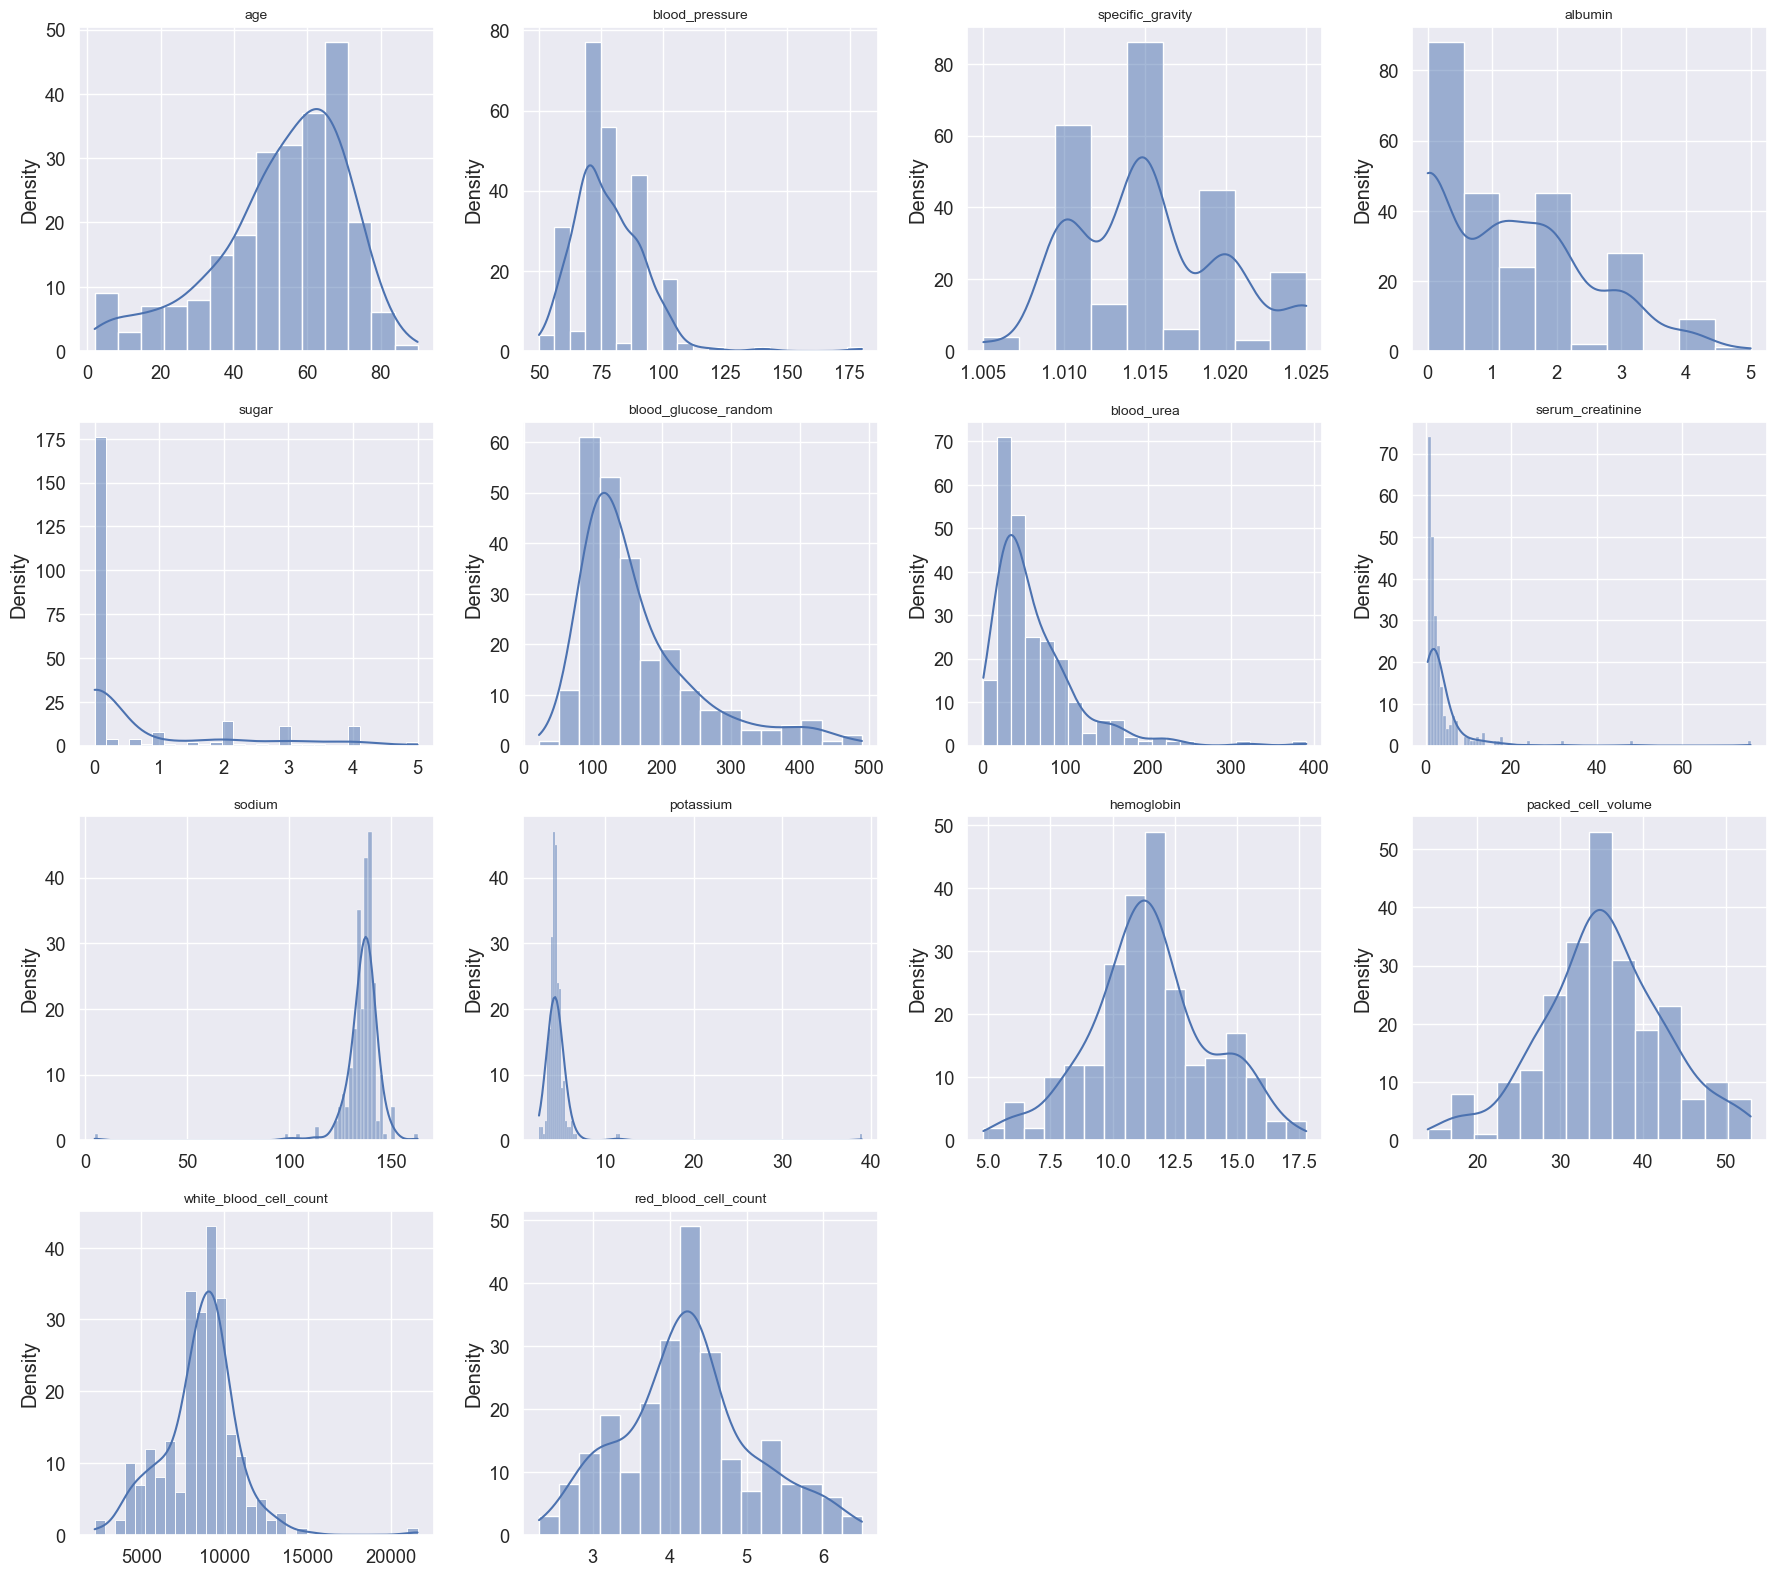

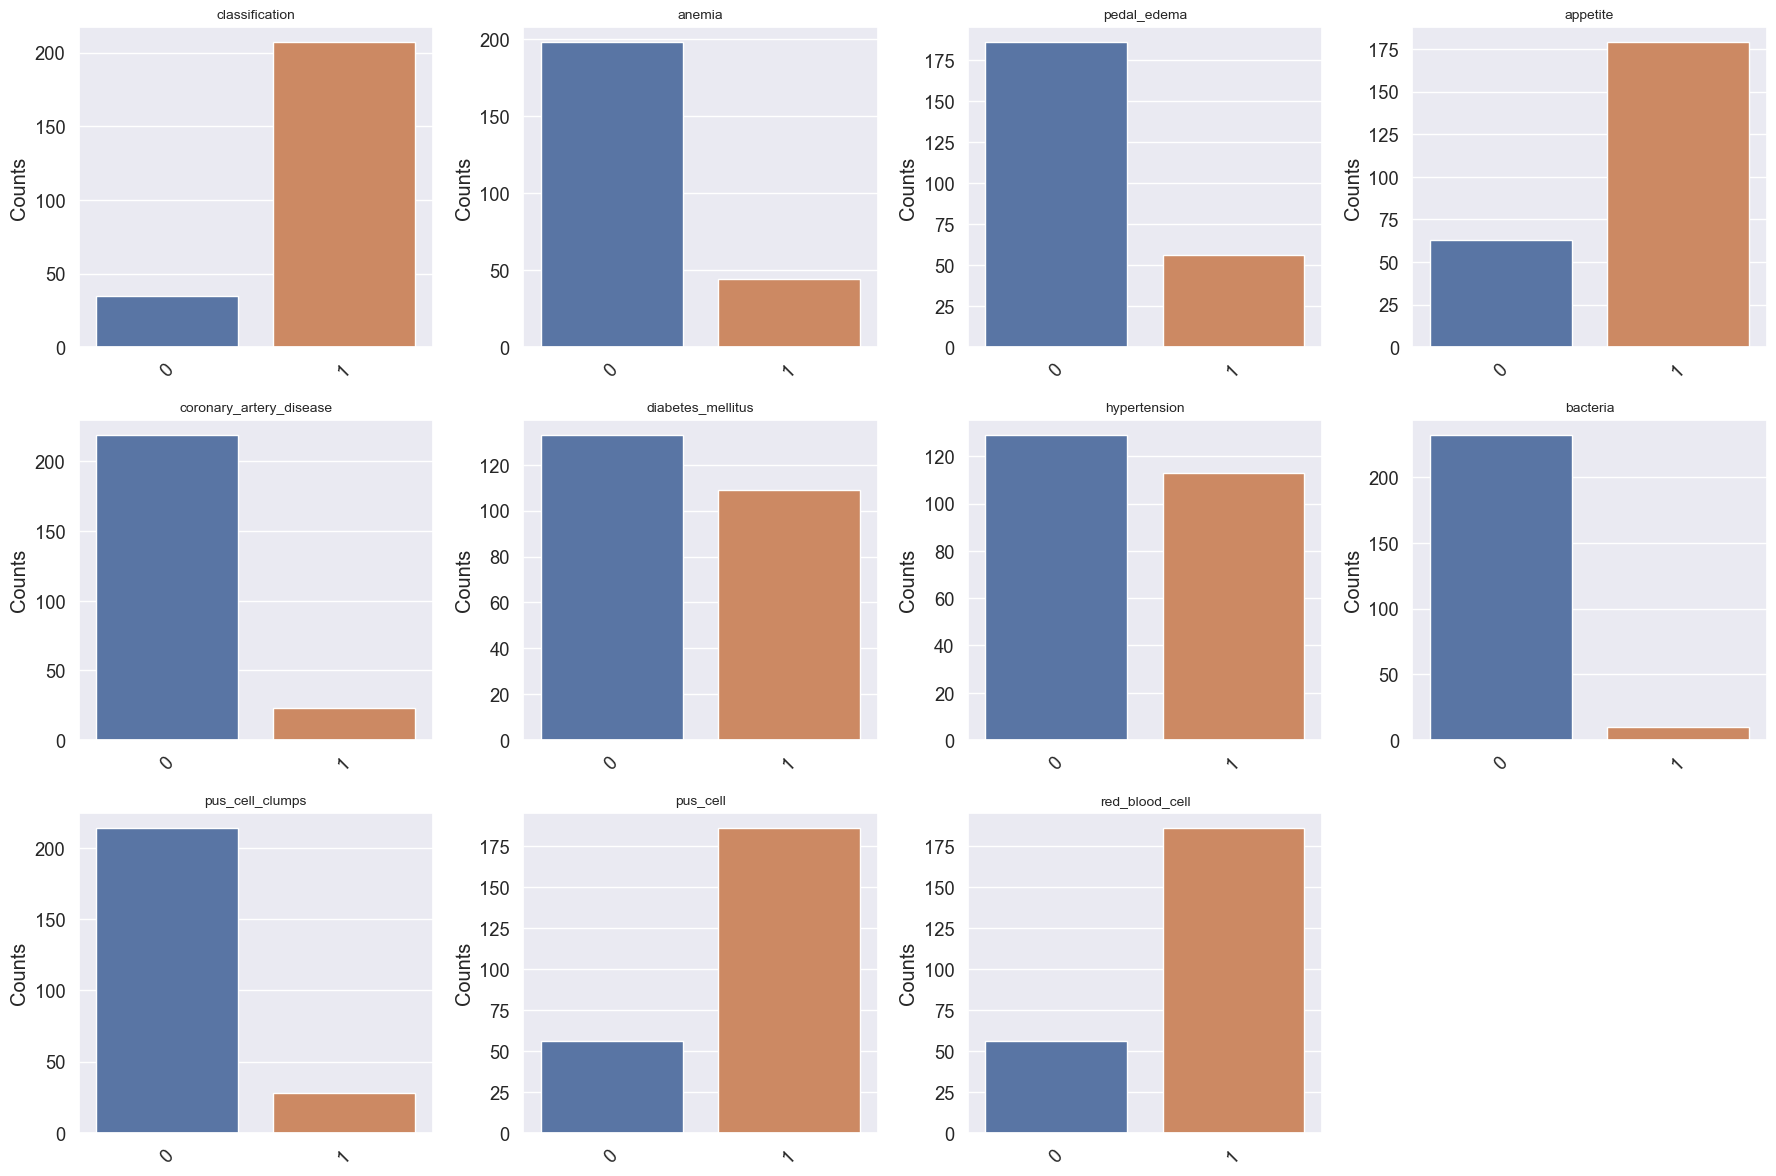

In [109]:
plot_numeric_distributions(kidney_train, numeric_columns=num_cols)
plot_categorical_distributions(kidney_train, categorical_cols)

#kidney_train.to_csv('datasets/kidney_cleaned.csv', index=False)

## Outlier / Skew

We can see in the plots above that there are potential outliers in the data. Since we dont havbe information where these outliers are comming from we cant delete them since they could also provide useful information since a unusal high value could indicate a kindey desease. 

Nevertheless outliers can bias our machine learning model. We can also see a skew in the data. That could also influence our machine learning models later since especially linear models use the assumption of normal distribution. 

This transformation also deal with the outlier problem.

In [110]:
kidney_train.isna().sum().sum()

0

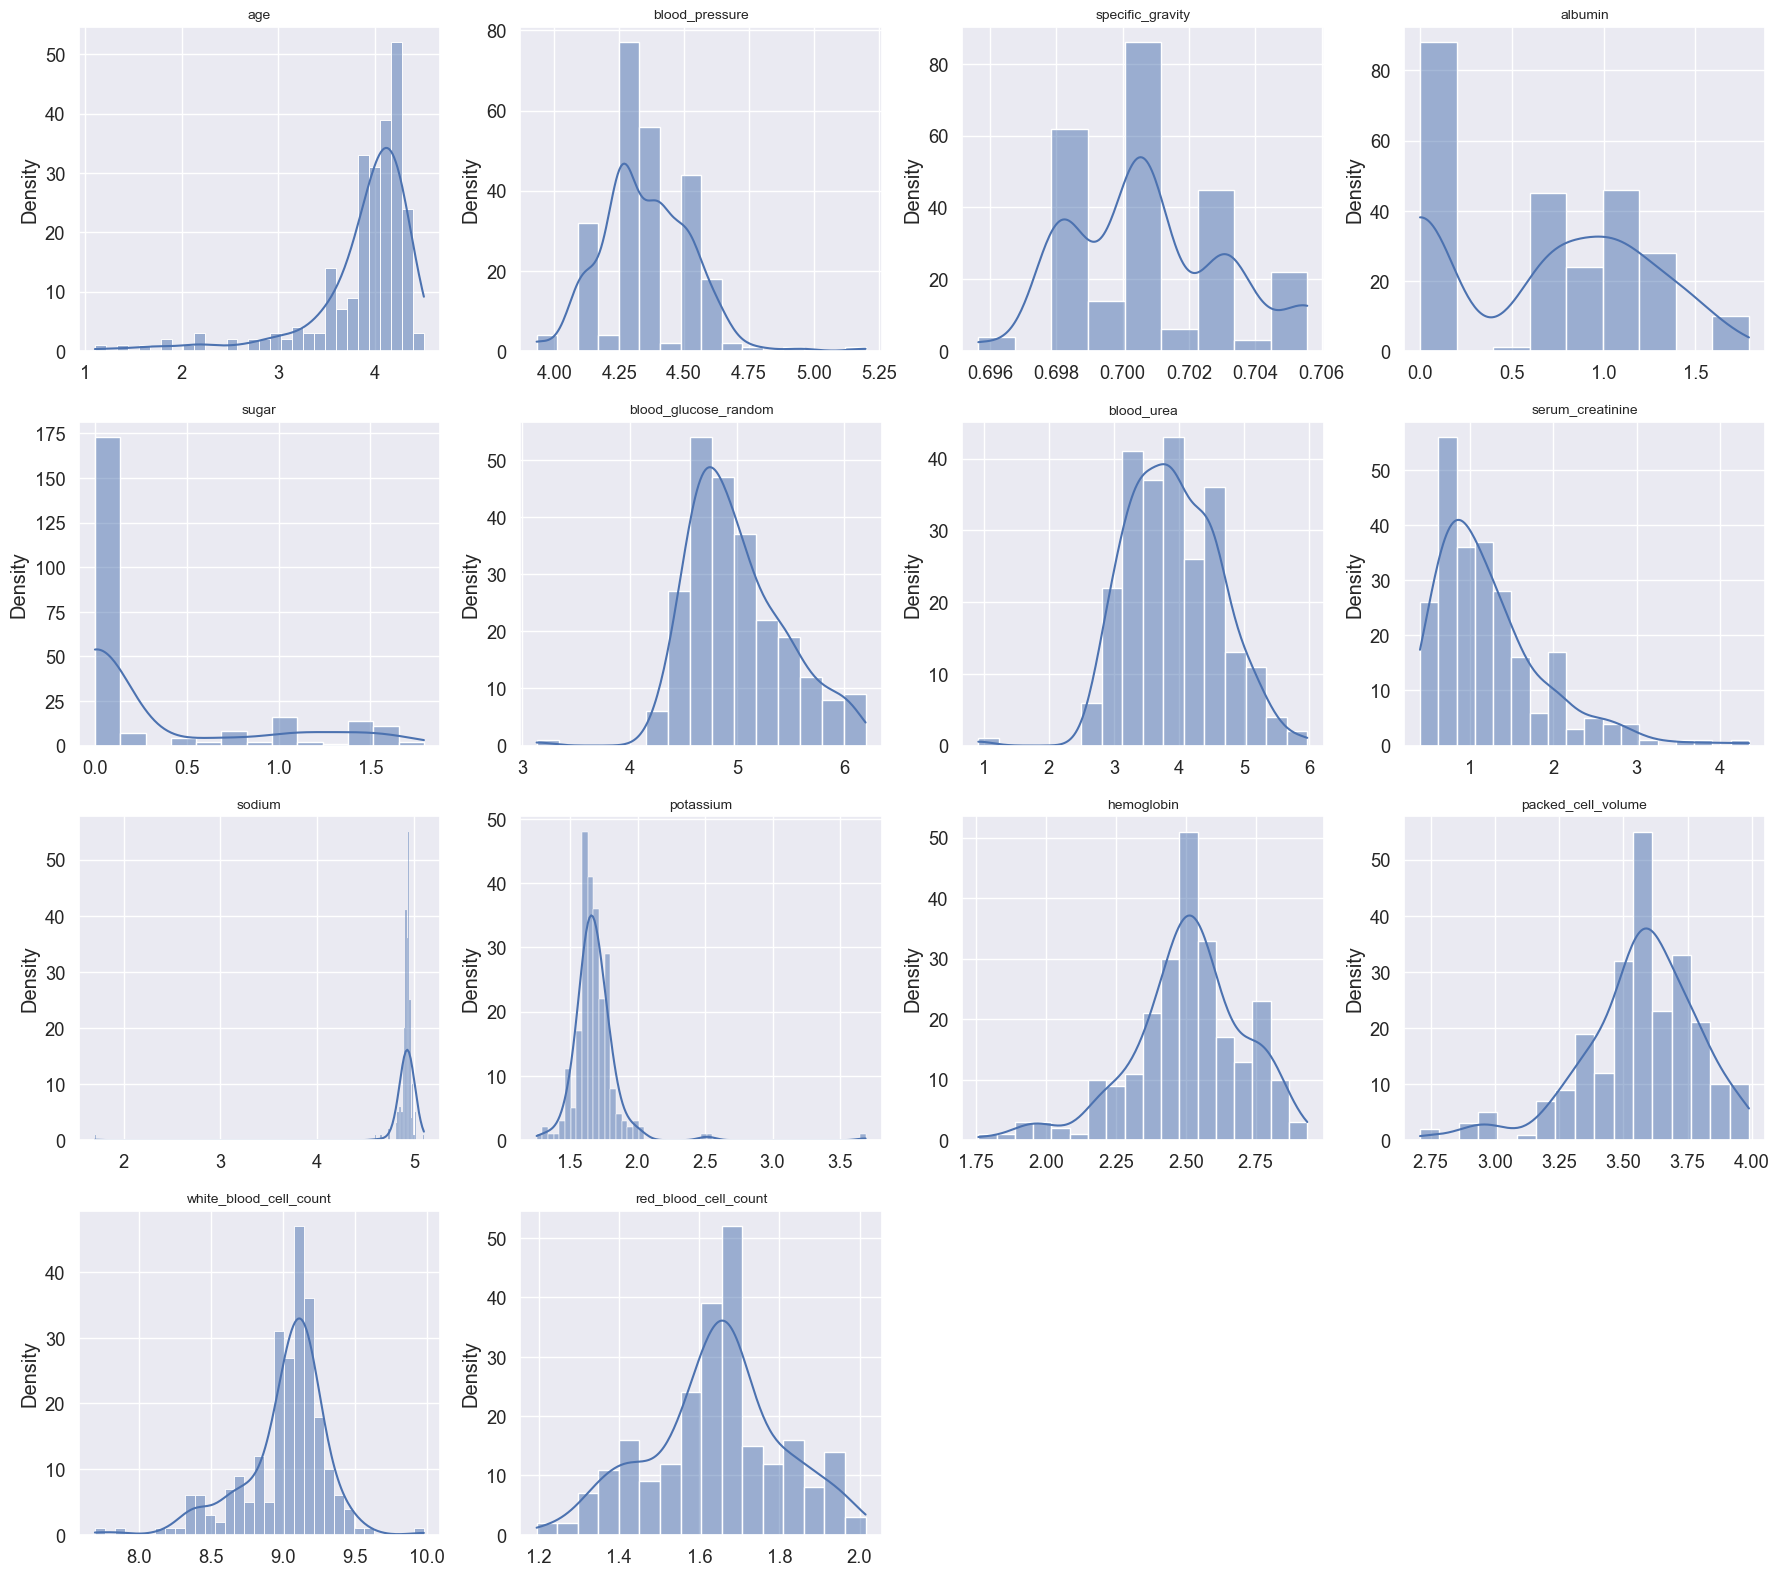

In [112]:
# log transfrom the numeric columns
#age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 
#'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 
#'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'

kidney_transformed = kidney_train.copy(deep=True)
kidney_transformed[num_cols] = np.log1p(kidney_train[num_cols])

plot_numeric_distributions(kidney_transformed, numeric_columns=num_cols)

## Split & Sampling 
From the plots we can see that the target variable is very unbalanced. This could be a problem and the classifier tend to predict the majority class.  


We will us sampling methods to balance the target variable and keep the classifier stable. 

We need to split the data in Training and Test data before! In the Test data the balance is of course the original/true distribution of the target column.

<Axes: >

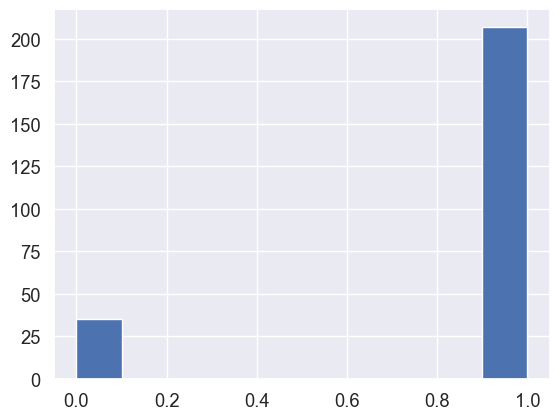

In [113]:
kidney_transformed['classification'].hist()

In [114]:
#from sklearn.model_selection import train_test_split
#kidney_train, kidney_test = train_test_split(kidney, 
#                                             test_size=0.23, 
#                                             random_state=111)

kidney_train = kidney_transformed.copy(deep=True)



<Axes: >

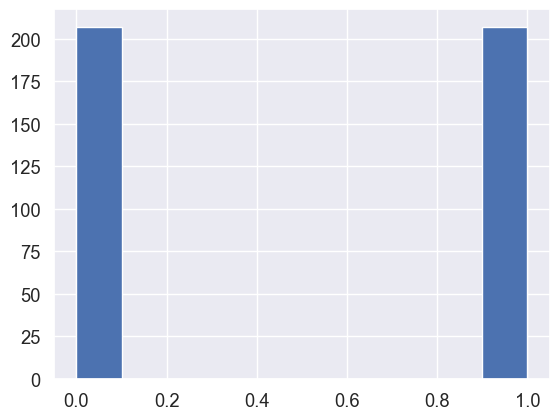

In [115]:
# Sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X_train = kidney_train.drop('classification', axis = 1)
y_train = kidney_train['classification']

ros = RandomOverSampler(random_state=111) #RandomOverSampler

X_ros, y_ros = ros.fit_resample(X_train, y_train)

kidney_train_oversampled = pd.DataFrame(X_ros, columns=X_train.columns)
kidney_train_oversampled['classification'] = y_ros

kidney_train_oversampled['classification'].hist()

The data set is now clean enough and we can proceed with the modelling.

# Classification

## Split data

In [116]:
kidney_train_oversampled.isna().sum().sum()

0

In [117]:
# Training set
# df_temp = kidney_train.copy(deep=True)

X_train = kidney_train_oversampled.drop('classification', axis=1)
y_train = kidney_train_oversampled['classification']


#Test set 
X_test = kidney_test.drop('classification', axis=1)
y_test = kidney_test['classification']


#y_test = kidney_test['classification'].hist()

X_train.isna().sum()


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
dtype: int64

In [119]:
# Build Pipeline for the model 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score


# Create a pipeline for the 4 models
pipelines = {
    'rf': Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(random_state=123))]),
    'gb': Pipeline([('scaler', StandardScaler()), ('classifier', GradientBoostingClassifier(random_state=123))]),
    'ada': Pipeline([('scaler', StandardScaler()), ('classifier', AdaBoostClassifier(random_state=123))]),
    'et': Pipeline([('scaler', StandardScaler()), ('classifier', ExtraTreesClassifier(random_state=123))])
}

# Define scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Train and evaluate the models
for pipe_name, pipeline in pipelines.items():
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    print(f"- {pipe_name} has been trained. -")
    
    # Cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring_metrics)


    # Output results
    print(f'{pipe_name} Results:')
    print('-----------------------------------')
    print(f"CV Accuracy: Mean={cv_results['test_accuracy'].mean():.3f}, Std={cv_results['test_accuracy'].std():.3f}")
    print(f"CV Precision: Mean={cv_results['test_precision'].mean():.3f}")
    print(f"CV Recall: Mean={cv_results['test_recall'].mean():.3f}")
    print(f"CV F1 Score: Mean={cv_results['test_f1'].mean():.3f}")
    print('')

        # Performance on test data
    print(f'Training Accuracy: {pipeline.score(X_train, y_train)}')
    print(f'Test Accuracy: {pipeline.score(X_test, y_test)}')
    print('')


- rf has been trained. -
rf Results:
-----------------------------------
CV Accuracy: Mean=0.998, Std=0.005
CV Precision: Mean=0.998
CV Recall: Mean=0.998
CV F1 Score: Mean=0.998

Training Accuracy: 1.0
Test Accuracy: 0.6518987341772152

- gb has been trained. -
gb Results:
-----------------------------------
CV Accuracy: Mean=0.998, Std=0.005
CV Precision: Mean=0.998
CV Recall: Mean=0.998
CV F1 Score: Mean=0.998

Training Accuracy: 1.0
Test Accuracy: 0.9936708860759493

- ada has been trained. -
ada Results:
-----------------------------------
CV Accuracy: Mean=0.998, Std=0.005
CV Precision: Mean=0.998
CV Recall: Mean=0.998
CV F1 Score: Mean=0.998

Training Accuracy: 1.0
Test Accuracy: 0.9936708860759493

- et has been trained. -
et Results:
-----------------------------------
CV Accuracy: Mean=0.998, Std=0.005
CV Precision: Mean=0.998
CV Recall: Mean=0.998
CV F1 Score: Mean=0.998

Training Accuracy: 1.0
Test Accuracy: 1.0

